#Import Libraries

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import skimage
import seaborn as sns

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from skimage.transform import resize

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data Preprocessing

In [4]:
import random
import shutil

In [5]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 27

train_len = 2308
train_dir = '/content/drive/MyDrive/Capstone/data_sign_language/training/training/'

def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int32)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['a']:
                label = 0
            elif folderName in ['b']:
                label = 1
            elif folderName in ['c']:
                label = 2
            elif folderName in ['d']:
                label = 3
            elif folderName in ['e']:
                label = 4
            elif folderName in ['f']:
                label = 5
            elif folderName in ['g']:
                label = 6
            elif folderName in ['h']:
                label = 7
            elif folderName in ['i']:
                label = 8
            elif folderName in ['j']:
                label = 9
            elif folderName in ['k']:
                label = 10
            elif folderName in ['l']:
                label = 11
            elif folderName in ['m']:
                label = 12
            elif folderName in ['n']:
                label = 13
            elif folderName in ['o']:
                label = 14
            elif folderName in ['p']:
                label = 15
            elif folderName in ['q']:
                label = 16
            elif folderName in ['r']:
                label = 17
            elif folderName in ['s']:
                label = 18
            elif folderName in ['t']:
                label = 19
            elif folderName in ['u']:
                label = 20
            elif folderName in ['v']:
                label = 21
            elif folderName in ['w']:
                label = 22
            elif folderName in ['x']:
                label = 23
            elif folderName in ['y']:
                label = 24
            elif folderName in ['z']:
                label = 25
            elif folderName in ['Space']:
                label = 26
            else:
                label = 27
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))

                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y
X_train, y_train = get_data(train_dir)
print("Images successfully imported...")

Images successfully imported...


In [6]:
print("The shape of X_train is : ", X_train.shape)
print("The shape of y_train is : ", y_train.shape)

The shape of X_train is :  (2308, 64, 64, 3)
The shape of y_train is :  (2308,)


In [7]:
print("The shape of one image is : ", X_train[0].shape)

The shape of one image is :  (64, 64, 3)


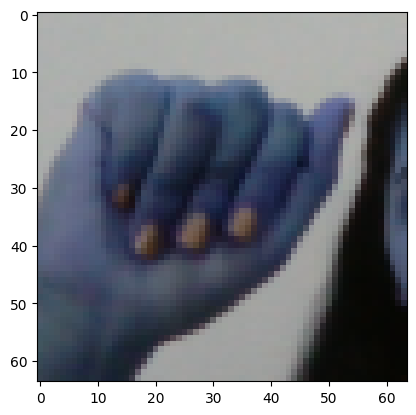

In [8]:
plt.imshow(X_train[0])
plt.show()

In [9]:
X_data = X_train
y_data = y_train
print("Copies made...")

Copies made...


In [10]:
from sklearn.model_selection import train_test_split
from collections import Counter

class_distributed = Counter(y_data)
print("Class distibuted before filtering: ", class_distributed)

min_samples_per_class = 27

filtered_classes = [label for label, count in class_distributed.items() if count >= min_samples_per_class]
selected_indices = [i for i in range(len(y_data)) if y_data[i] in filtered_classes]
X_data_filtered = X_data[selected_indices]
y_data_filtered = y_data[selected_indices]

class_distributed_filtered = Counter(y_data_filtered)
print("Class distributed after filtering: ", class_distributed_filtered)

X_train, X_test, y_train, y_test = train_test_split(X_data_filtered, y_data_filtered, test_size=0.2,random_state=42,stratify=y_data_filtered)

Class distibuted before filtering:  Counter({21: 96, 0: 86, 1: 81, 2: 81, 4: 81, 3: 81, 6: 81, 22: 81, 23: 81, 5: 80, 7: 80, 8: 80, 9: 80, 11: 80, 12: 80, 13: 80, 14: 80, 15: 80, 16: 80, 17: 80, 18: 80, 26: 80, 19: 80, 20: 80, 24: 80, 25: 80, 10: 70, 31278: 24, -1: 13, 31277: 12, -1857666768: 2, -424587904: 2, -1871699536: 2, -1857666864: 2, -1857015376: 2, -424537856: 2, -1858846928: 2, -424590784: 2, -1858972432: 2, -1857666832: 2, -424538048: 2, -1859036944: 2, -1857666800: 2, -424591104: 2, -1859037200: 2, -424686976: 2, -1858775504: 2, -1857666736: 2, 4980776: 1, -65499: 1, 1179745: 1, -65447: 1, 1114111: 1, -65506: 1, -65503: 1, -65535: 1, 5111889: 1, 4128840: 1, -65491: 1, 5636095: 1, -65493: 1, 4259839: 1, 4784203: 1, -65450: 1, 1252034786: 1, -778881199: 1, -1649739870: 1, -206803733: 1, -1147207401: 1, 855124505: 1, 1588348684: 1, 1404923558: 1, -810211674: 1, -1954284546: 1, -658710744: 1, -2057896792: 1, 1877761074: 1, -304988260: 1, 140796524: 1, -243338691: 1, -2044885198

In [11]:
print(np.unique(y_train))
print(np.unique(y_test))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]


In [12]:
print(np.bincount(y_train))
print(np.bincount(y_test))

[68 65 65 65 65 64 65 64 64 64 56 64 64 64 64 64 64 64 64 64 64 76 65 65
 64 64 64]
[18 16 16 16 16 16 16 16 16 16 14 16 16 16 16 16 16 16 16 16 16 20 16 16
 16 16 16]


In [13]:
from keras.utils import to_categorical
y_cat_train = to_categorical(y_train,27)
y_cat_test = to_categorical(y_test,27)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)

(1743, 64, 64, 3)
(1743,)
(436, 64, 64, 3)
(436,)
(1743, 27)
(436, 27)


#Create Model

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
print("Packages imported...")

Packages imported...


In [16]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(27, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 activation (Activation)     (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                   

In [17]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

#Training

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(X_train, y_cat_train,
          epochs=50,
          batch_size=64,
          verbose=2,
          validation_data=(X_test, y_cat_test),
          callbacks=[early_stop])

Epoch 1/50
28/28 - 15s - loss: 3.2957 - accuracy: 0.0436 - val_loss: 3.2741 - val_accuracy: 0.0596 - 15s/epoch - 545ms/step
Epoch 2/50
28/28 - 8s - loss: 3.1539 - accuracy: 0.1004 - val_loss: 2.9484 - val_accuracy: 0.1606 - 8s/epoch - 284ms/step
Epoch 3/50
28/28 - 10s - loss: 2.4803 - accuracy: 0.3035 - val_loss: 2.2851 - val_accuracy: 0.3532 - 10s/epoch - 364ms/step
Epoch 4/50
28/28 - 10s - loss: 1.7527 - accuracy: 0.4814 - val_loss: 1.7777 - val_accuracy: 0.4656 - 10s/epoch - 358ms/step
Epoch 5/50
28/28 - 8s - loss: 1.2447 - accuracy: 0.6368 - val_loss: 1.5392 - val_accuracy: 0.5757 - 8s/epoch - 301ms/step
Epoch 6/50
28/28 - 10s - loss: 0.8934 - accuracy: 0.7378 - val_loss: 1.2580 - val_accuracy: 0.6583 - 10s/epoch - 371ms/step
Epoch 7/50
28/28 - 8s - loss: 0.5797 - accuracy: 0.8371 - val_loss: 1.1158 - val_accuracy: 0.6972 - 8s/epoch - 291ms/step
Epoch 8/50
28/28 - 11s - loss: 0.3621 - accuracy: 0.8893 - val_loss: 1.0241 - val_accuracy: 0.7592 - 11s/epoch - 401ms/step
Epoch 9/50
28/

In [20]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,3.295660,0.043603,3.274118,0.059633
1,3.153887,0.100402,2.948380,0.160550
2,2.480268,0.303500,2.285058,0.353211
3,1.752702,0.481354,1.777711,0.465596
4,1.244747,0.636833,1.539243,0.575688
5,0.893440,0.737808,1.258024,0.658257
6,0.579663,0.837063,1.115819,0.697248
7,0.362089,0.889271,1.024061,0.759174
8,0.210770,0.942628,0.877502,0.788991
9,0.147161,0.959266,0.957572,0.786697


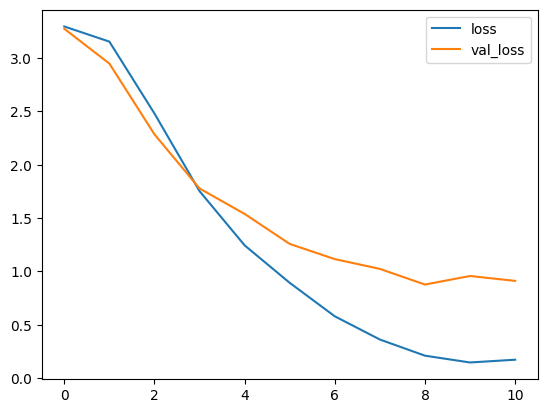

In [21]:
metrics[['loss','val_loss']].plot()
plt.show()

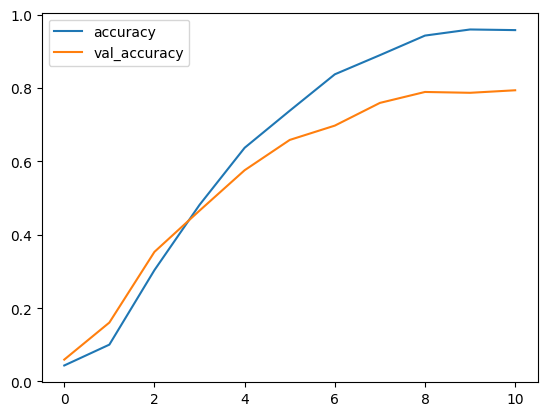

In [22]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

In [23]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.9116206765174866, 0.7935779690742493]

In [24]:
y_test = y_test.ravel()

# Now, check the shape and type
print("Shape of y_test:", y_test.shape)
print("Type of y_test:", type(y_test))

predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
print("Predictions done...")

Shape of y_test: (436,)
Type of y_test: <class 'numpy.ndarray'>
14/14 [==============================] - 1s 62ms/step
Predictions done...


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predicted_classes))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       0.79      0.69      0.73        16
           2       1.00      0.88      0.93        16
           3       0.71      0.94      0.81        16
           4       0.76      1.00      0.86        16
           5       1.00      0.94      0.97        16
           6       0.78      0.88      0.82        16
           7       0.83      0.94      0.88        16
           8       0.73      0.50      0.59        16
           9       0.38      0.56      0.45        16
          10       0.82      0.64      0.72        14
          11       0.87      0.81      0.84        16
          12       0.88      0.88      0.88        16
          13       0.73      1.00      0.84        16
          14       0.72      0.81      0.76        16
          15       0.93      0.81      0.87        16
          16       0.94      0.94      0.94        16
          17       0.48    

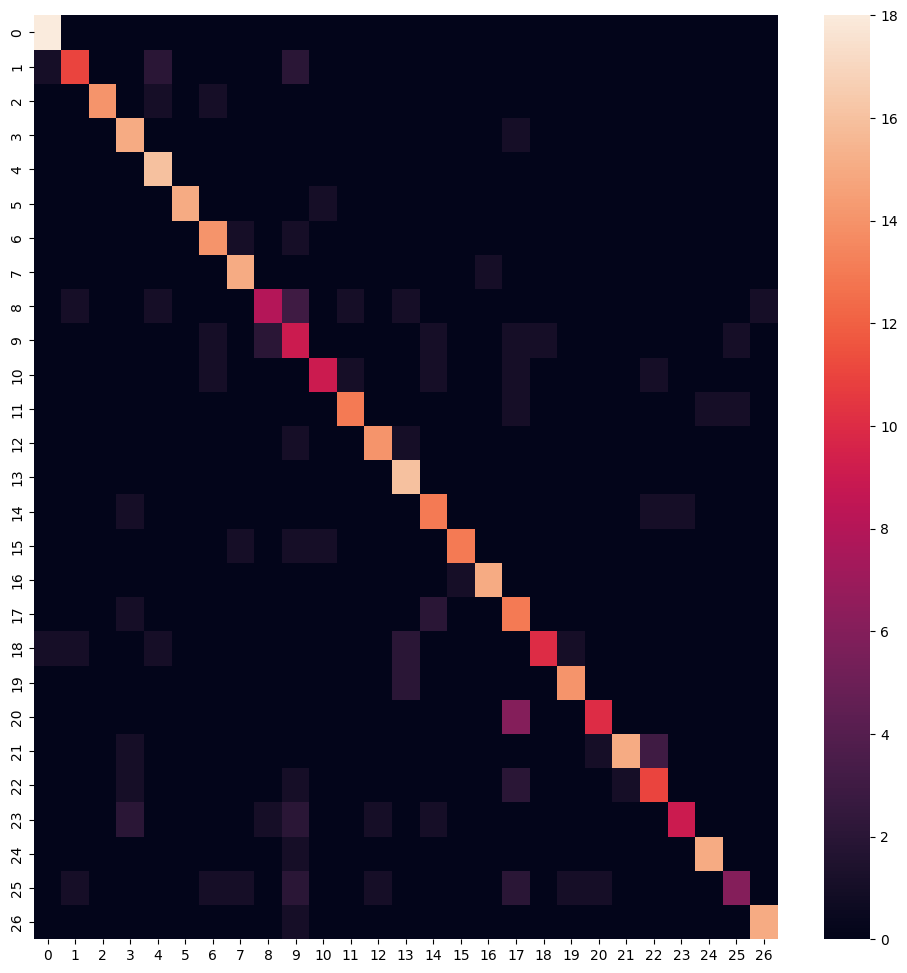

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test,predicted_classes))
plt.show()

In [ ]:
model.save('your_model_name.h5')

In [45]:
import tensorflow as tf
# Save the model in the SavedModel format
model.save('/content/drive/MyDrive/Capstone/data_sign_language/model')

# Convert the SavedModel to TensorFlow.js format
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model --signature_name=serving_default --saved_model_tags=serve /content/drive/MyDrive/Capstone/data_sign_language/model /content/drive/MyDrive/Capstone/data_sign_language/model

2023-12-13 23:31:46.217874: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-13 23:31:46.217927: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-13 23:31:46.219126: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-13 23:31:47.444100: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-12-13 23:31:50.146216: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the gui